# Transformation
## Scaling

In [190]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import subplots
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, FORECAST_MEASURES, HEIGHT, set_chart_labels, FONT_TEXT, plot_multibar_chart
from matplotlib.axes import Axes
from numpy import ndarray, arange
from math import sqrt
from matplotlib.container import BarContainer


def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Extract the R2 value for the test data
    r2_tst = FORECAST_MEASURES["R2"](tst, prd_tst)

    # print(eval1, eval2)
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs, r2_tst

In [191]:
from sklearn.preprocessing import StandardScaler

def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

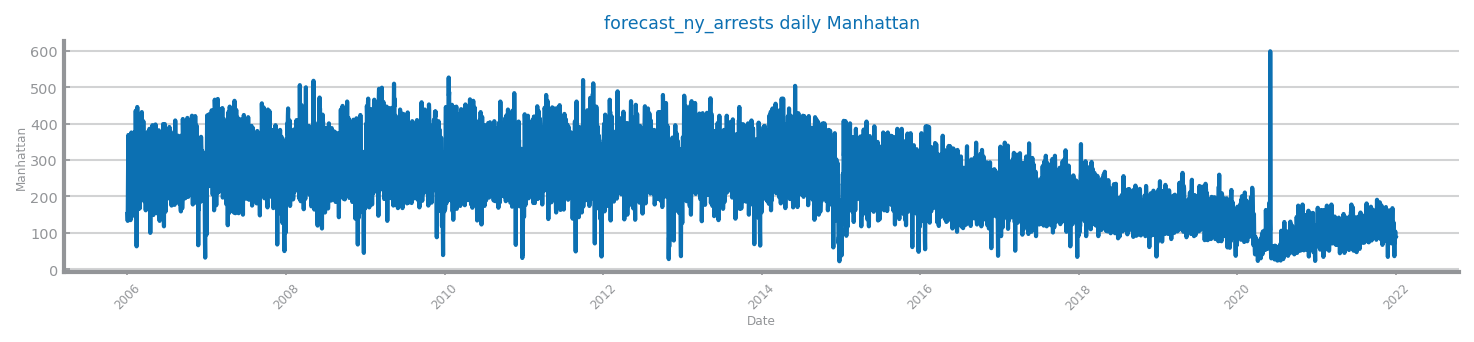

In [192]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

path_to_directory = "C:/Users/vasco/OneDrive/Documentos/DS/repo/data_science_project/datasets"
file_tag = "forecast_ny_arrests"
target = "Manhattan"
data: DataFrame = read_csv(
    f"{path_to_directory}/forecast_ny_arrests.csv",
    index_col="Date",
    sep=";",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()

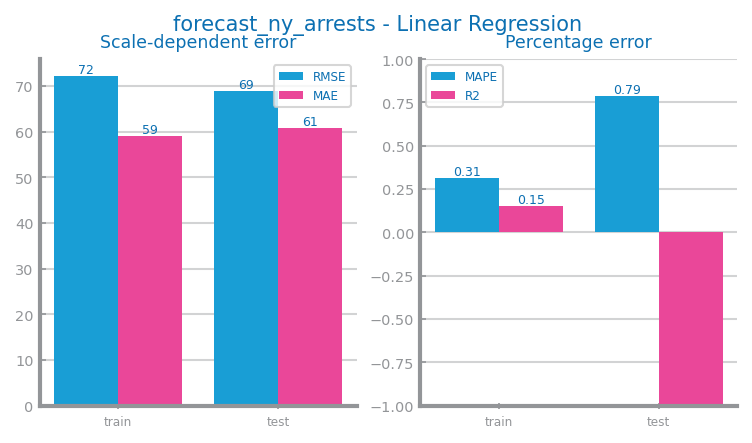

In [193]:
train, test = series_train_test_split(data, trn_pct=0.80)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

_, r2 = plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

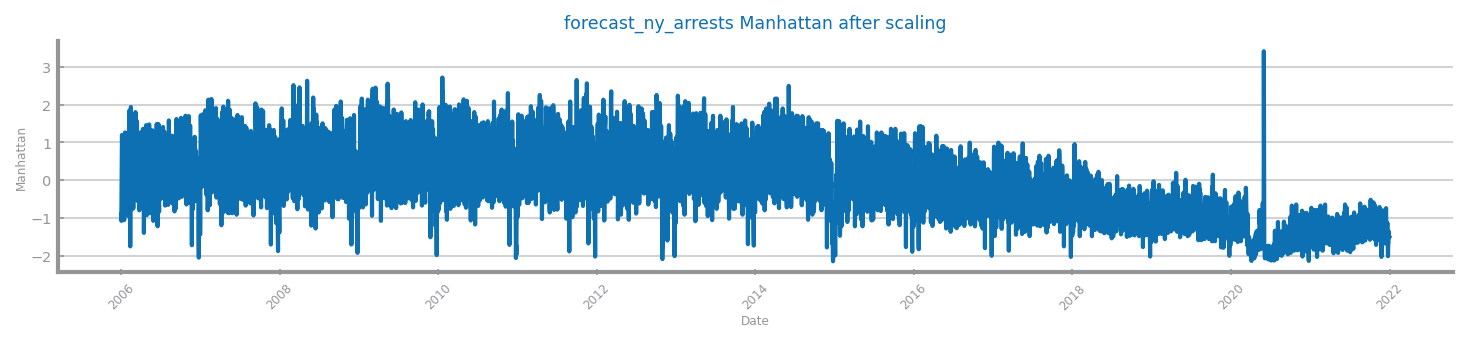

In [194]:
df: DataFrame = scale_all_dataframe(data)

ss: Series = df[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss.index.to_list(),
    ss.to_list(),
    xlabel=ss.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after scaling",
)
show()

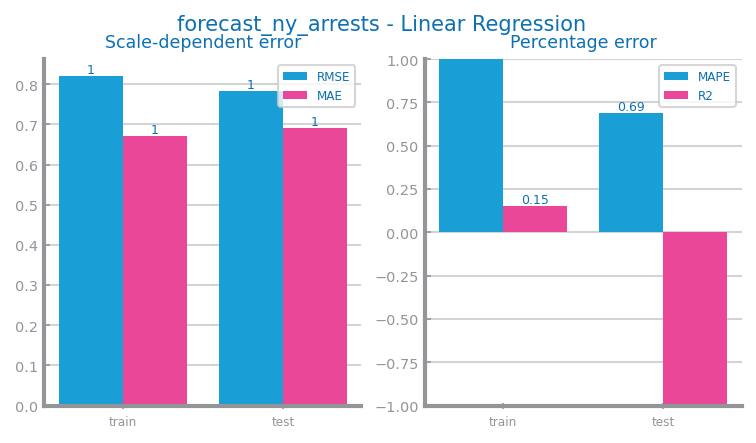

In [195]:
train, test = series_train_test_split(df, trn_pct=0.80)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(df)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

_, r2_scaling = plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
#savefig(f"{path_to_directory}/images/Set 2 - Forecasting results after scaling.png", bbox_inches='tight')

In [196]:
# Define the R2 values
r2_values = {
    "no scaling": r2,
    "scaling": r2_scaling
}

# Find the key with the maximum R2 value
highest_r2_label = max(r2_values, key=r2_values.get)
highest_r2_value = r2_values[highest_r2_label]

# Print the R2 values and the highest one
print(f"R2 values: {r2_values}")
print(f"Highest R2 is '{highest_r2_label}' with a value of {highest_r2_value}")

# Assign variables based on the highest R2 label
if highest_r2_label == "scaling":
    data = df
    r2_previous = r2_scaling
    r2_previous_label = highest_r2_label

R2 values: {'no scaling': -2.254025433324433, 'scaling': -2.2540254333244345}
Highest R2 is 'no scaling' with a value of -2.254025433324433


## Aggregation

<Axes: title={'center': 'forecast_ny_arrests monthly Manhattan'}, xlabel='Date', ylabel='Manhattan'>

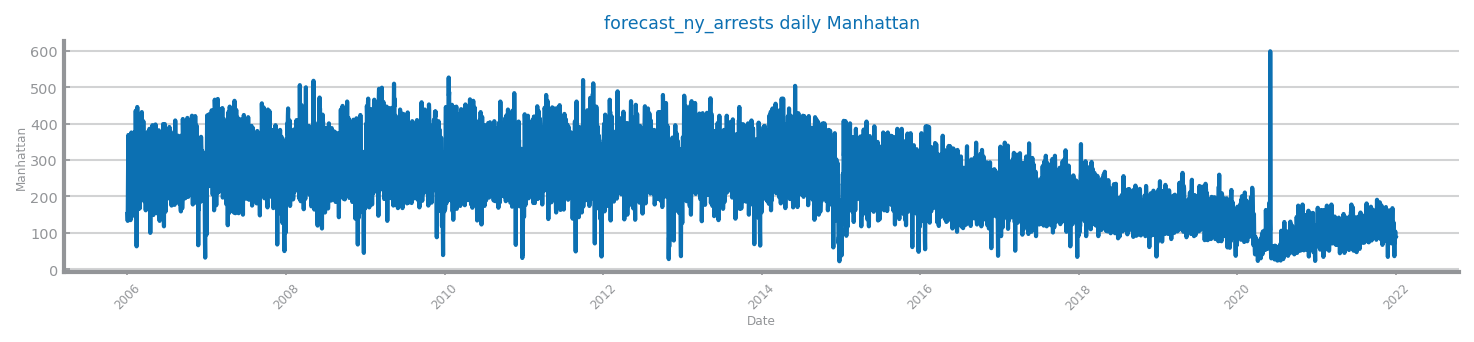

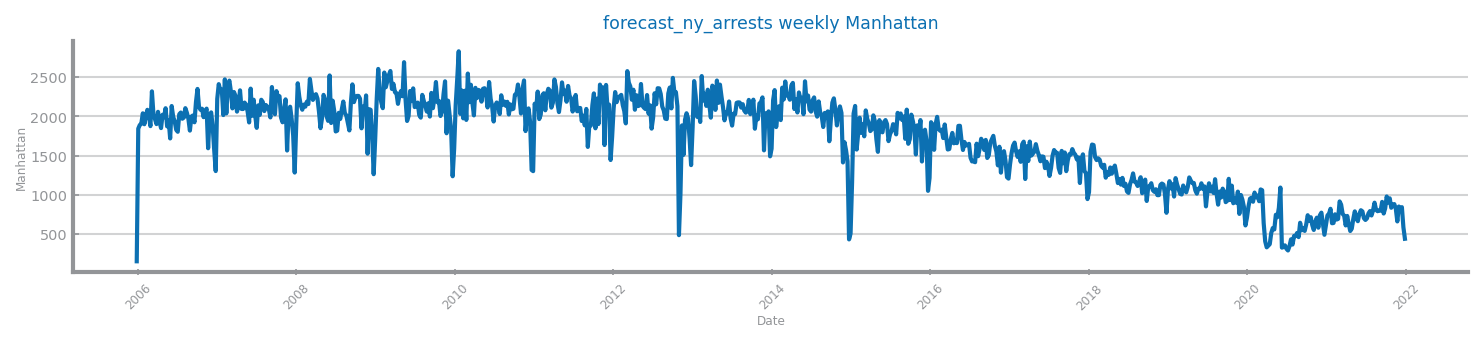

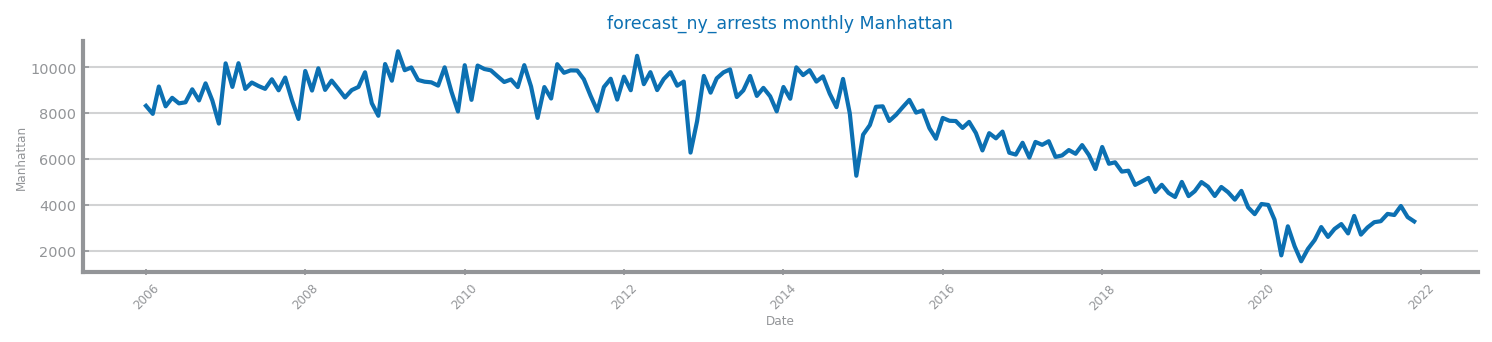

In [197]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from dslabs_functions import plot_ts_multivariate_chart

series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel=ss_months.index.name,
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)




### Evaluation for regular granularity (daily)

<Axes: xlabel='Date', ylabel='Manhattan'>

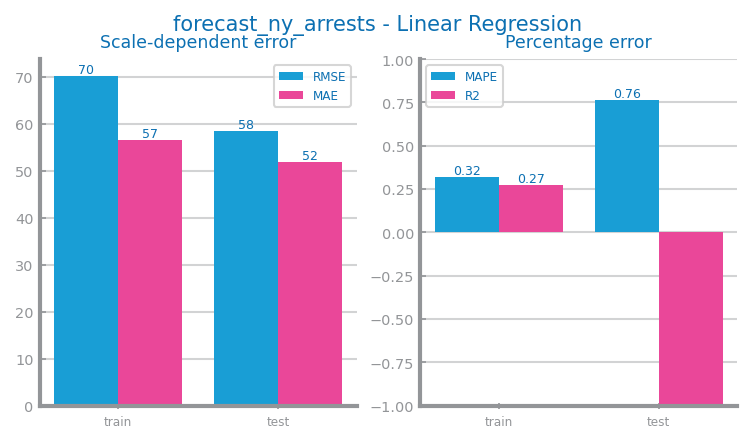

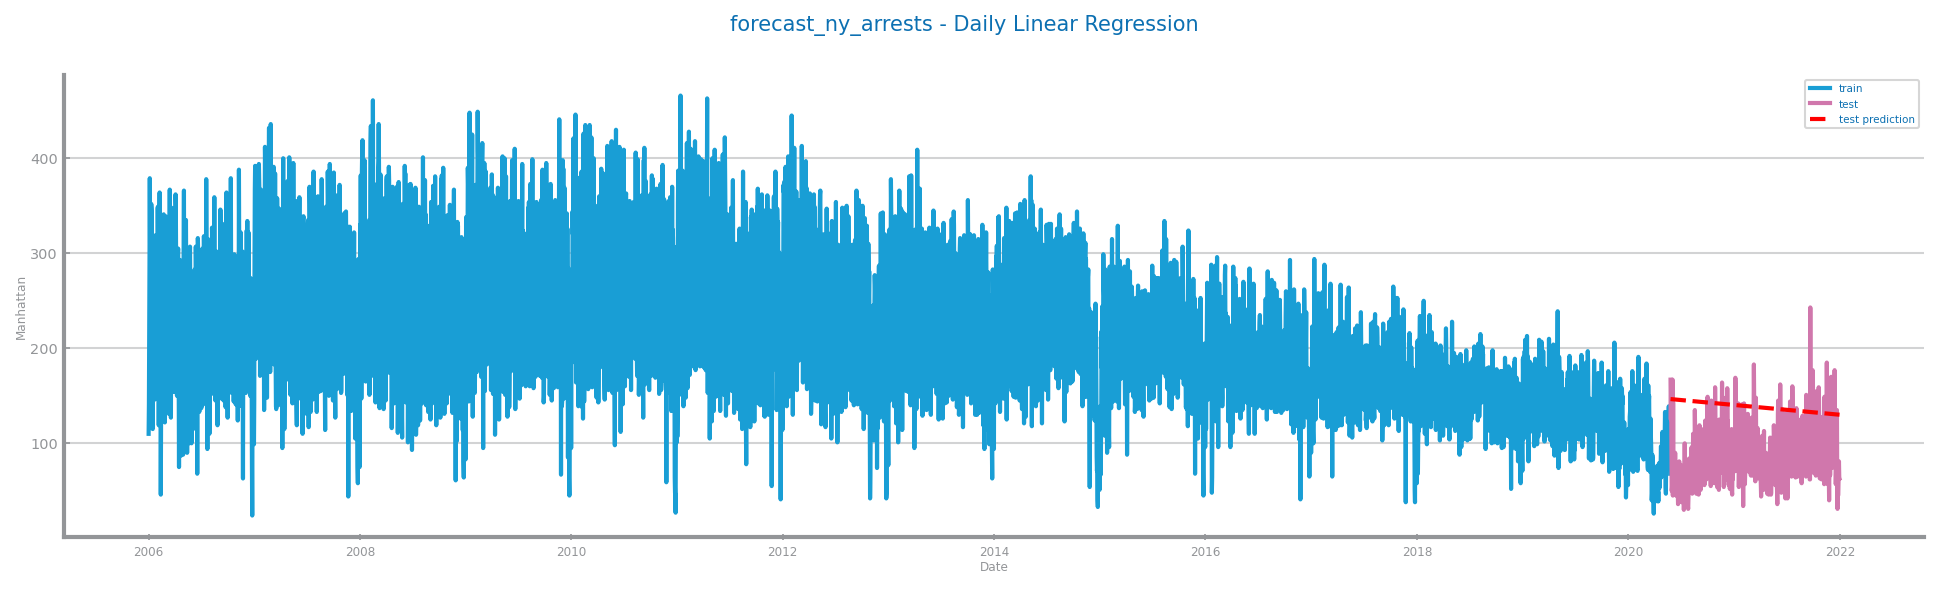

In [198]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split

timecol: str = "Date"

series: Series = data[target]
train, test = series_train_test_split(data, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

_,r2_agg_daily = plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
#savefig(f"images/{file_tag}_linear_regression_eval.png")

from dslabs_functions import plot_forecasting_series



plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Daily Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
#savefig(f"images/{file_tag}_daily_linear_regression_forecast.png")

### Evaluation for weekly granularity

<Axes: xlabel='Date', ylabel='Manhattan'>

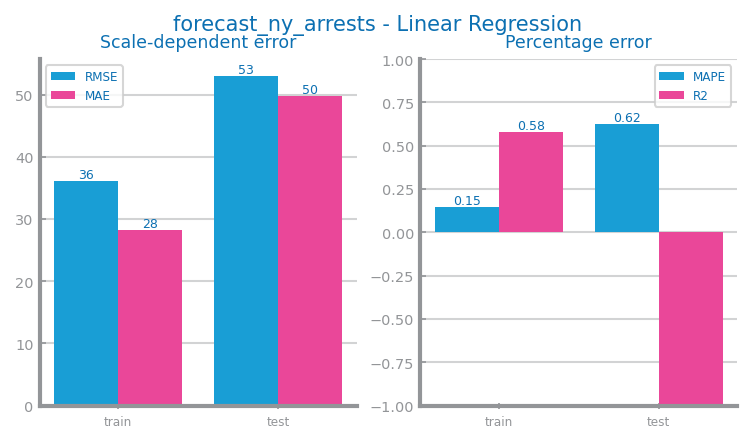

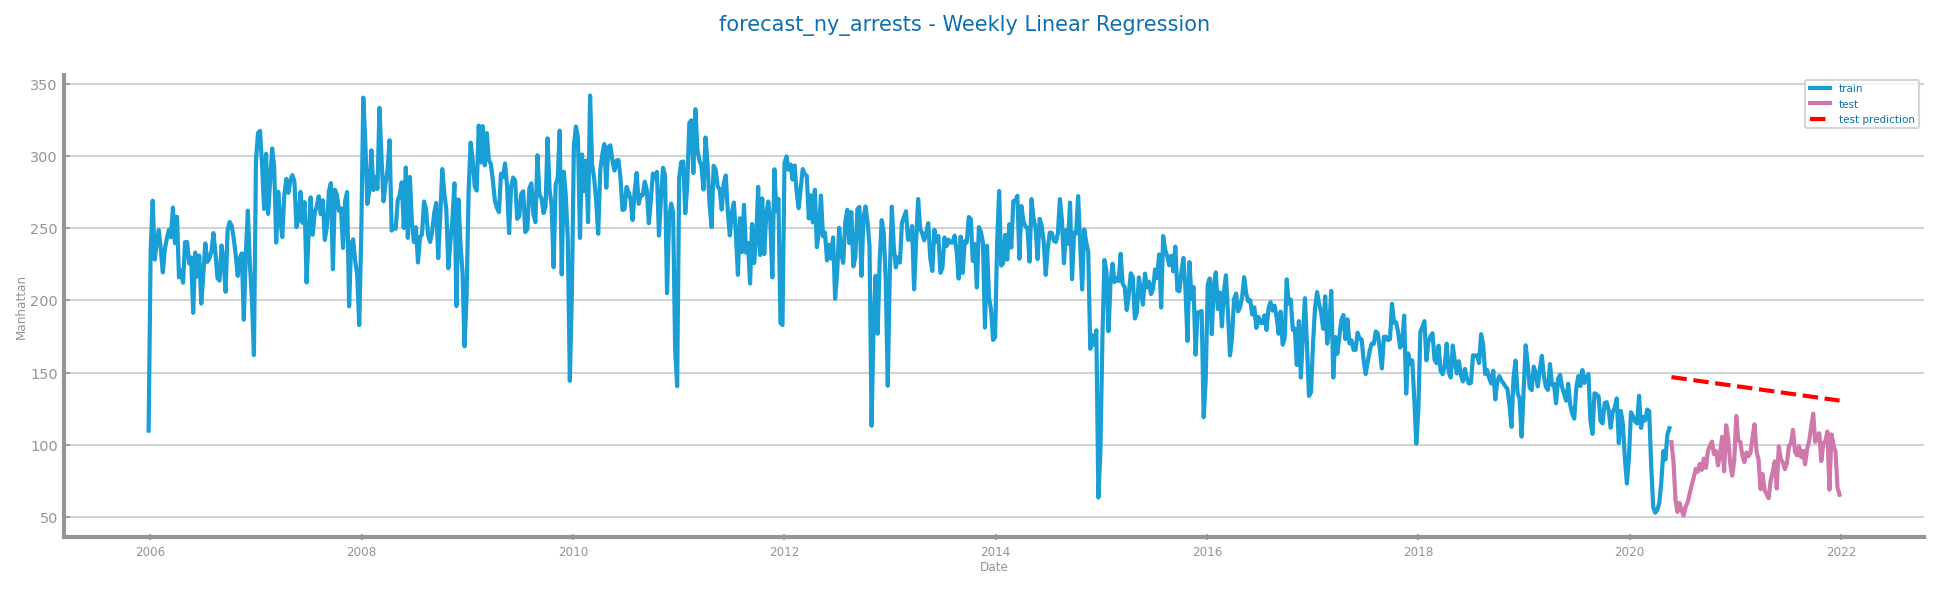

In [199]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split

timecol: str = "Date"

series: Series = data[target]

agg_week: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="mean")
#series_week: Series = agg_week[target]

train, test = series_train_test_split(agg_week, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(agg_week)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

_,r2_agg_weekly=plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Weekly Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
#savefig(f"images/{file_tag}_weekly_linear_regression_forecast.png")

### Evaluation for monthly granularity

<Axes: xlabel='Date', ylabel='Manhattan'>

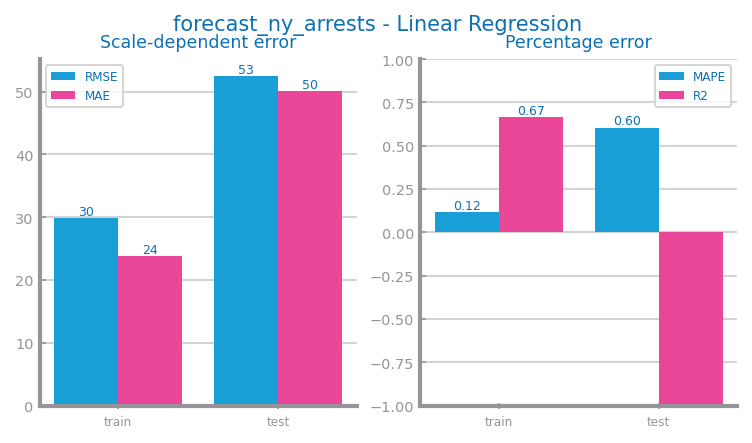

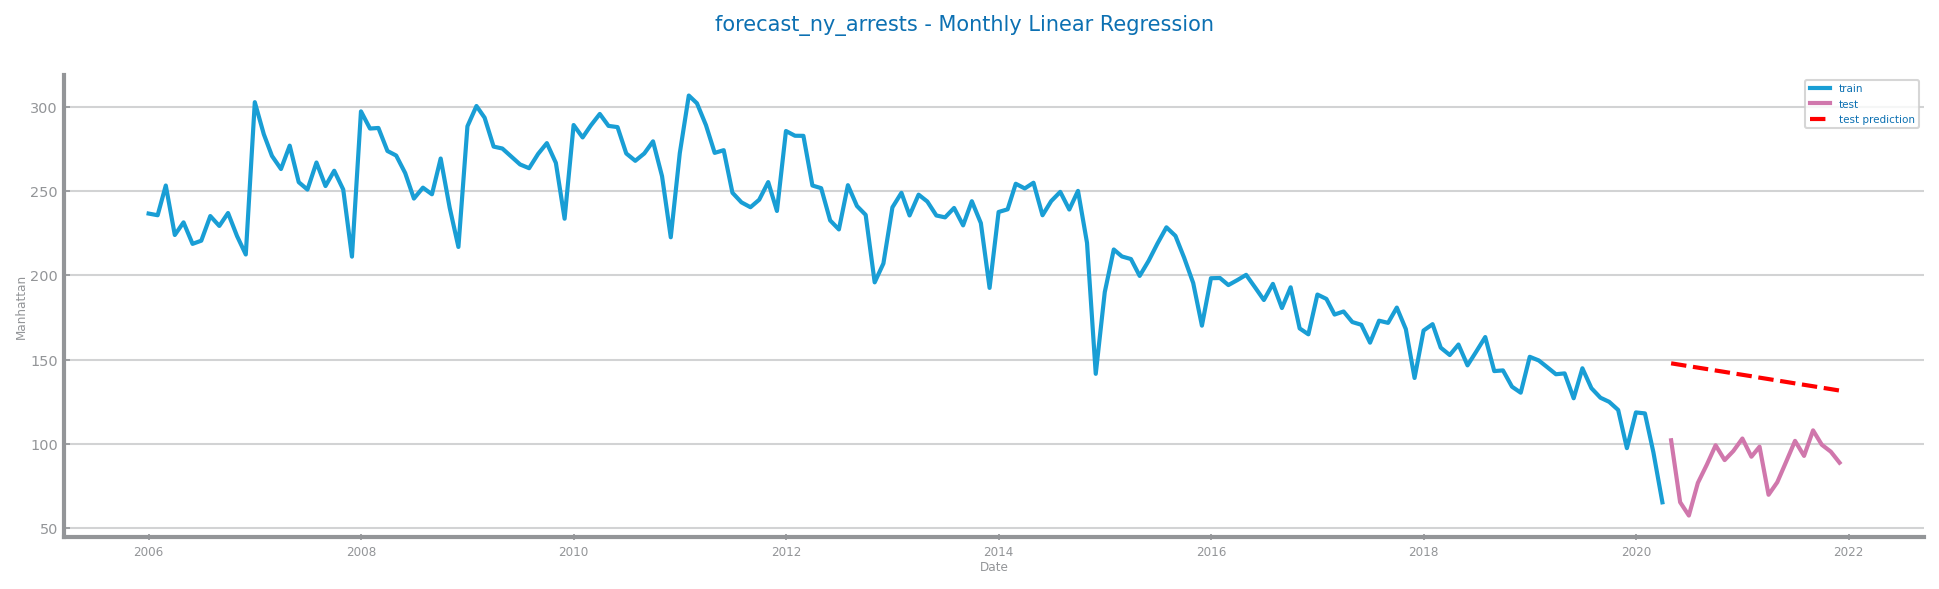

In [200]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split
timecol: str = "Date"

series: Series = data[target]

agg_monthly: DataFrame = ts_aggregation_by(data, gran_level="M", agg_func="mean")
#series_week: Series = agg_week[target]

train, test = series_train_test_split(agg_monthly, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(agg_monthly)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

_,r2_agg_monthly=plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

from dslabs_functions import plot_forecasting_series



plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Monthly Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
#savefig(f"images/{file_tag}_monthly_linear_regression_forecast.png")

In [201]:
# Define the R2 values
r2_values = {
    
    "daily": r2_agg_daily,
    "weekly": r2_agg_weekly,
    "monthly": r2_agg_monthly,
}
#print(r2_agg_monthly, r2_agg_daily,r2_agg_weekly)
# Find the key with the maximum R2 value
highest_r2_label = max(r2_values, key=r2_values.get)
highest_r2_value = r2_values[highest_r2_label]

# Print the R2 values and the highest one
print(f"R2 values: {r2_values}")
print(f"Highest R2 is '{highest_r2_label}' with a value of {highest_r2_value}")

# Assign variables based on the highest R2 label
if highest_r2_label == "Daily":
    #data = agg_df_3_year
    r2_previous = r2_agg_daily
    r2_previous_label = highest_r2_label
elif highest_r2_label == "Weekly":
    data = agg_week
    r2_previous = r2_agg_weekly
    r2_previous_label = highest_r2_label
elif highest_r2_label == "Monthly":
    data = agg_monthly
    r2_previous = r2_agg_monthly
    r2_previous_label = highest_r2_label

R2 values: {'daily': -2.716633889310143, 'weekly': -9.968944039997647, 'monthly': -14.728678162471734}
Highest R2 is 'daily' with a value of -2.716633889310143


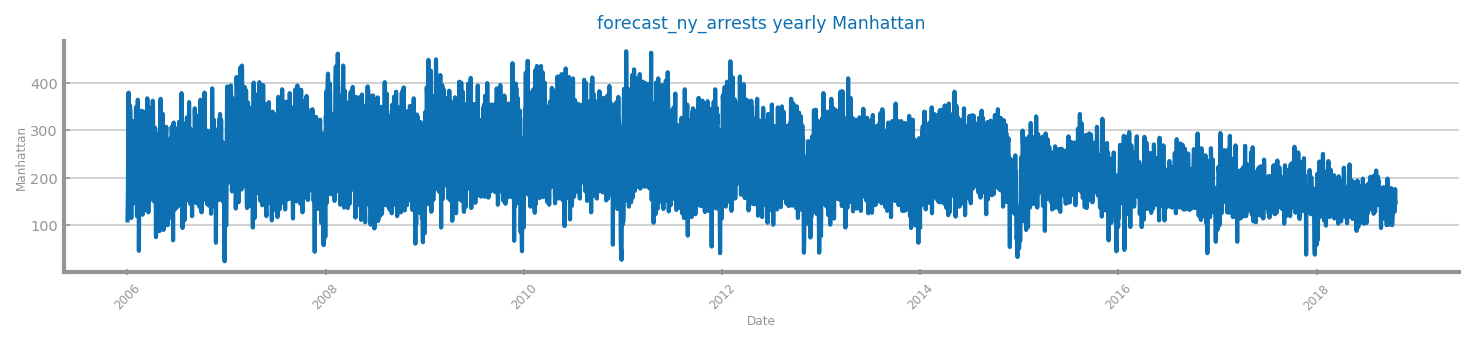

In [202]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT


train, test = series_train_test_split(data, trn_pct=0.80)

series: Series = train

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
#figure()
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)
show()

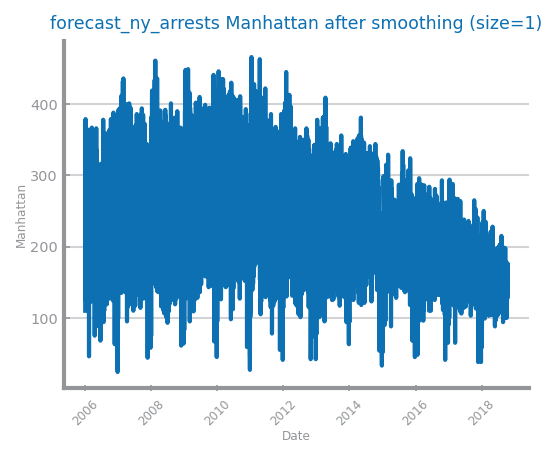

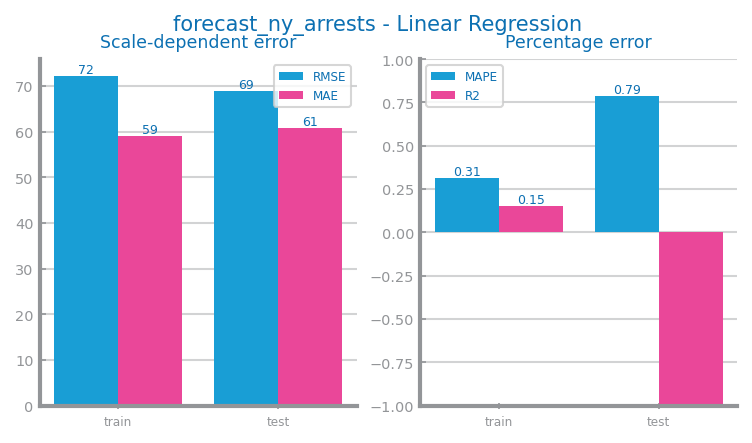

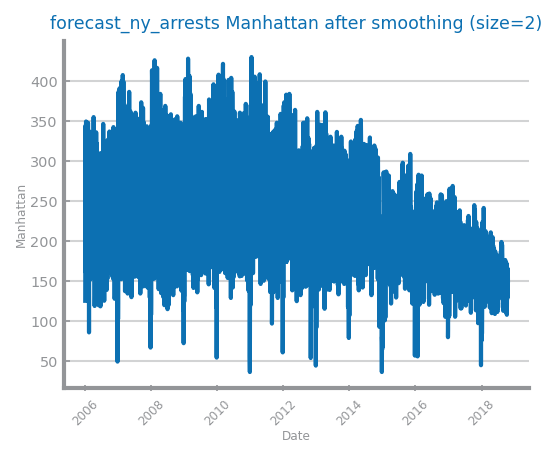

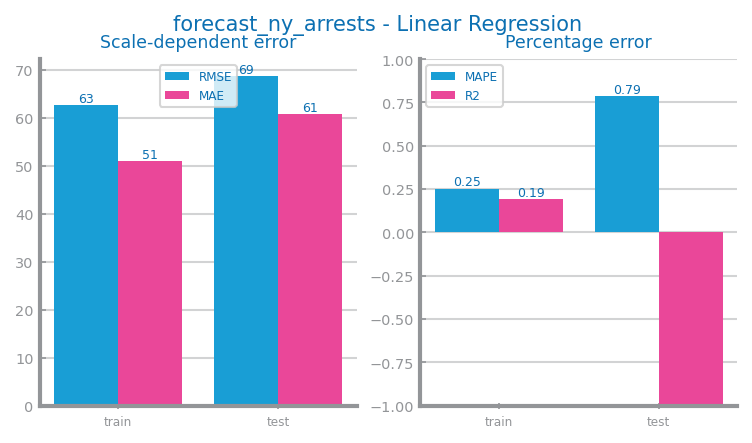

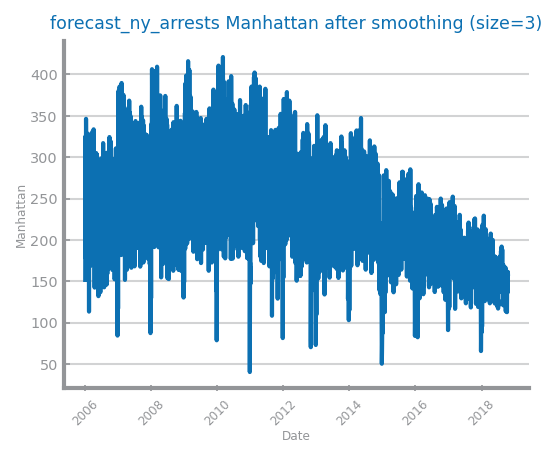

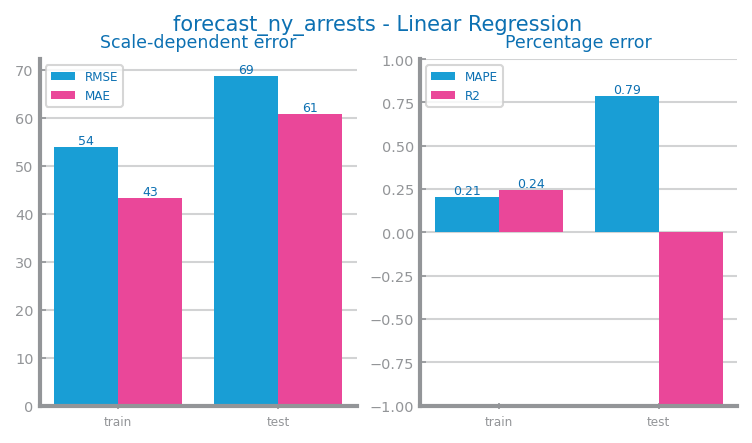

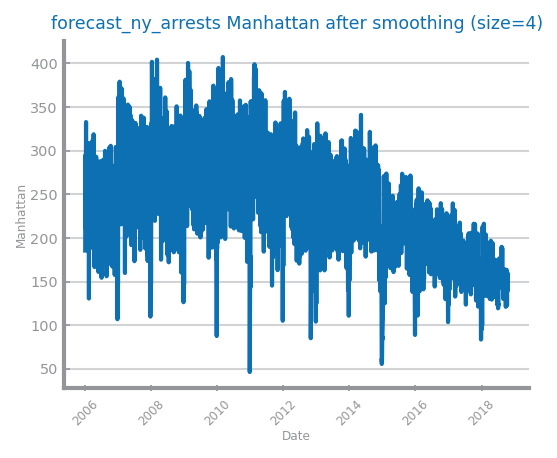

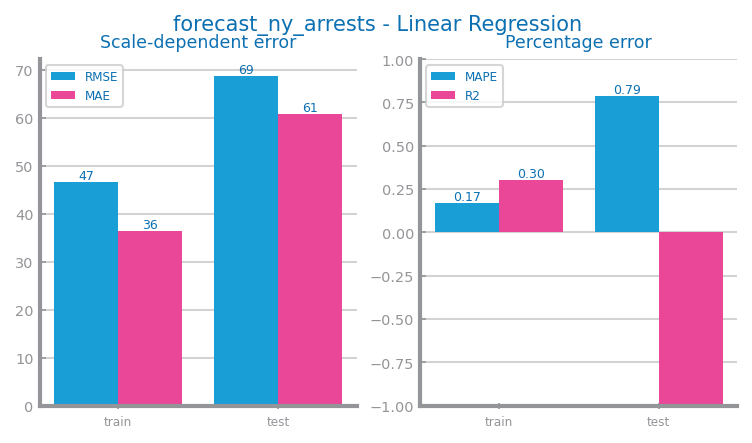

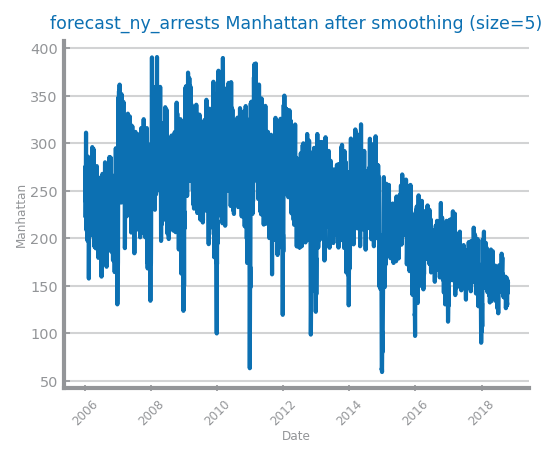

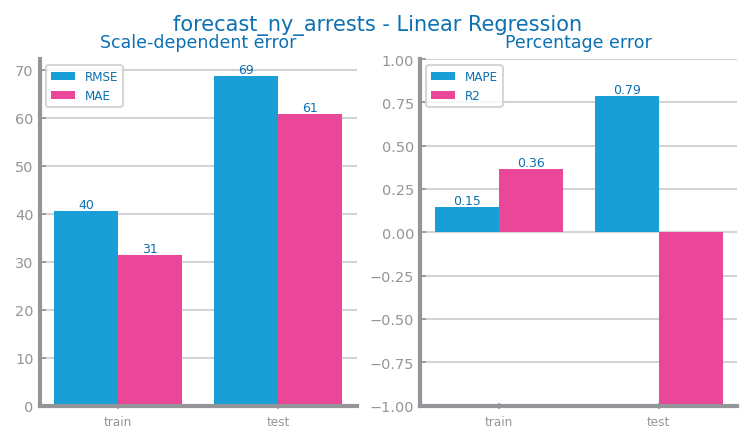

In [203]:
from numpy import isnan

evaluation_results = {}  # Dictionary to store evaluation results for each size
sizes: list[int] = [1,2,3,4,5]

for size in sizes:
    # Smooth the series using a rolling window
    ss_smooth: Series = series.rolling(window=size).mean()

    # Plot smoothed data
    figure()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"{file_tag} {target} after smoothing (size={size})",
    )

    # Prepare training and testing data
    trnX = arange(len(ss_smooth)).reshape(-1, 1)
    trnY = ss_smooth.to_numpy()
    tstX = arange(len(ss_smooth), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()

    # Exclude NaN values from the training data
    valid_indices = ~isnan(trnY)  # Boolean mask for valid (non-NaN) entries
    trnX_valid = trnX[valid_indices]
    trnY_valid = trnY[valid_indices]

    # Train the model on valid data
    model = LinearRegression()
    model.fit(trnX_valid, trnY_valid)

    # Predict on training and testing data
    prd_trn_values = model.predict(trnX_valid)
    prd_trn: Series = Series(prd_trn_values, index=ss_smooth.index[valid_indices])

    prd_tst_values = model.predict(tstX)
    prd_tst: Series = Series(prd_tst_values, index=test.index)

    # Align the indices of the smoothed series to avoid mismatches
    ss_smooth_valid = ss_smooth.dropna()

    # Plot forecasting evaluation
    _, evaluation_results[size] = plot_forecasting_eval(ss_smooth_valid, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

    show()

In [204]:
best_size = max(evaluation_results, key=lambda size: evaluation_results[size])
best_value = evaluation_results[best_size]

# Print all evaluation results and the best one
print(f"Evaluation results: {evaluation_results}")
print(f"The best result is for size '{best_size}' with a value of {best_value}")

Evaluation results: {1: -2.254025433324433, 2: -2.251953097457072, 3: -2.2502479523508447, 4: -2.2489258198150615, 5: -2.248926086415196}
The best result is for size '4' with a value of -2.2489258198150615


## Differentiation

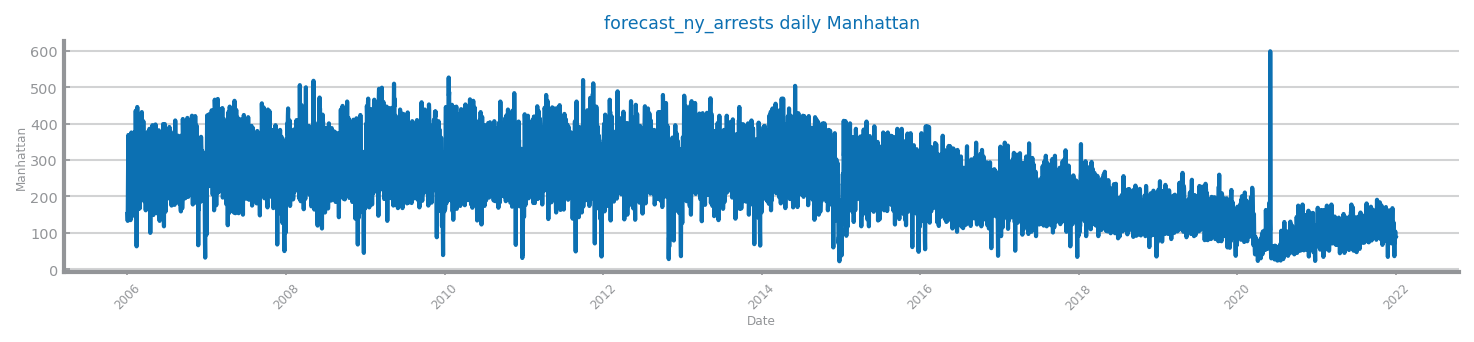

In [210]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()

Date
2006-01-01      NaN
2006-01-02    -19.0
2006-01-03    104.0
2006-01-04     65.0
2006-01-05     67.0
              ...  
2021-12-27      3.0
2021-12-28     18.0
2021-12-29     15.0
2021-12-30    -17.0
2021-12-31      1.0
Name: Manhattan, Length: 5844, dtype: float64


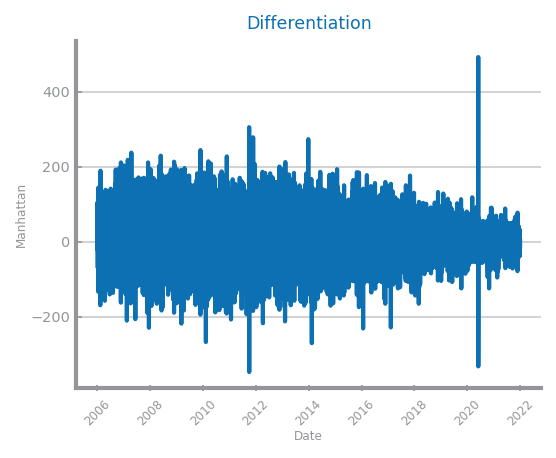

In [211]:
from dslabs_functions import plot_line_chart

ss_diff: Series = series.diff()
print(ss_diff)
figure()
plot_line_chart(
    ss_diff.index.to_list(),
    ss_diff.to_list(),
    title="Differentiation",
    xlabel=series.index.name,
    ylabel=target,
)
show()

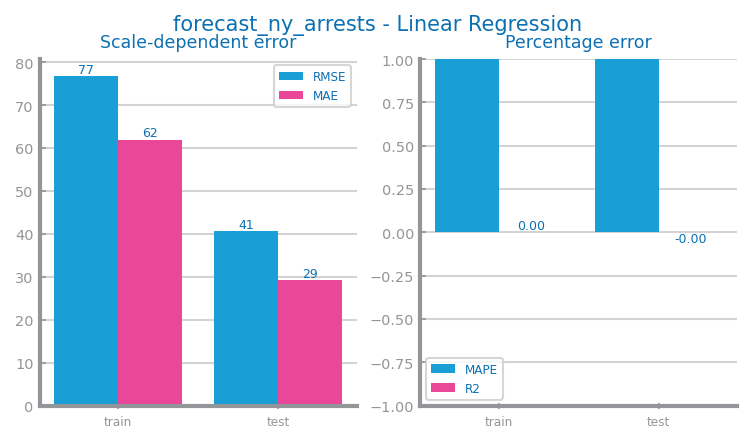

In [212]:
def series_train_test_split2(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()
    train: Series = df_cp.iloc[:trn_size]
    test: Series = df_cp.iloc[trn_size:]
    return train, test

# Split the data
train, test = series_train_test_split2(ss_diff.fillna(0), trn_pct=0.80)  # Fill NaNs with 0 in `ss_diff`

# Prepare train and test inputs
trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(ss_diff)).reshape(-1, 1)
tstY = test.to_numpy()

# Train the model
model = LinearRegression()
model.fit(trnX, trnY)

# Make predictions
prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

# Evaluate and plot
_, r2_diff = plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

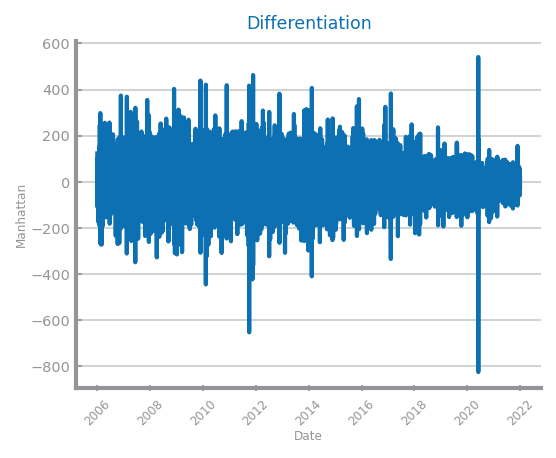

In [213]:
from dslabs_functions import plot_line_chart

ss_diff2: Series = ss_diff.diff()
figure()
plot_line_chart(
    ss_diff2.index.to_list(),
    ss_diff2.to_list(),
    title="Differentiation",
    xlabel=ss_diff.index.name,
    ylabel=target,
)
show()

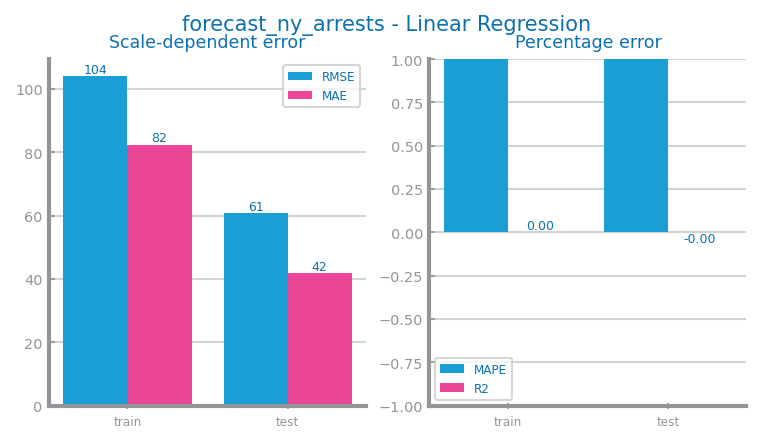

In [214]:
# Split the data
train, test = series_train_test_split2(ss_diff2.fillna(0), trn_pct=0.80)  # Fill NaNs with 0 in `ss_diff`

# Prepare train and test inputs
trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(ss_diff2)).reshape(-1, 1)
tstY = test.to_numpy()

# Train the model
model = LinearRegression()
model.fit(trnX, trnY)

# Make predictions
prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

# Evaluate and plot
_, r2_diff2 = plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")

In [216]:
# Define the R2 values
r2_values = {
    "1st diff": r2_diff,
    "2nd diff": r2_diff2
}

# Find the key with the maximum R2 value
highest_r2_label = max(r2_values, key=r2_values.get)
highest_r2_value = r2_values[highest_r2_label]

# Print the R2 values and the highest one
print(f"R2 values: {r2_values}")
print(f"Highest R2 is '{highest_r2_label}' with a value of {highest_r2_value}")

R2 values: {'1st diff': -7.601227633324825e-06, '2nd diff': -4.424736228525461e-07}
Highest R2 is '2nd diff' with a value of -4.424736228525461e-07
